In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from cell import Cell
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import seaborn as sns
import copy

In [3]:
def get_growth_info(ts):
    exp_gr = []
    for t, gr in zip(ts.t, np.gradient(np.log(ts.y[4]))):
        if 100 < t < admin_time and gr > 0.0:
            exp_gr.append(gr)
        if admin_time < t and gr <= 0.0001:
            print("time to growth halt: {}".format(t - admin_time))
            break
    print("growth rate before treatment: {}".format(np.mean(exp_gr)))
    div_time = [0]
    recovered = False
    for t, gr in zip(ts.t, np.gradient(np.log(ts.y[4]))):
        if 100 < t < admin_time and gr < 0.0 and t > div_time[-1] + 2 * time_step:
            div_time.append(t)
        if recovery_time < t and  -0.0001 < gr - np.mean(exp_gr) < 0.0001:
            print("time to growth recovery: {}".format(t - recovery_time))
            recovered = True
            break
    if not recovered:
        print("never recovered")
    div_time.pop(0)
    print("generation time: {}".format(np.mean(np.diff(div_time))))

  2%|▎         | 25/1000 [00:00<00:07, 125.29‰/s]

Cell size at treatment end: 1.0


100%|█████████▉| 999/1000 [00:08<00:00, 116.39‰/s]


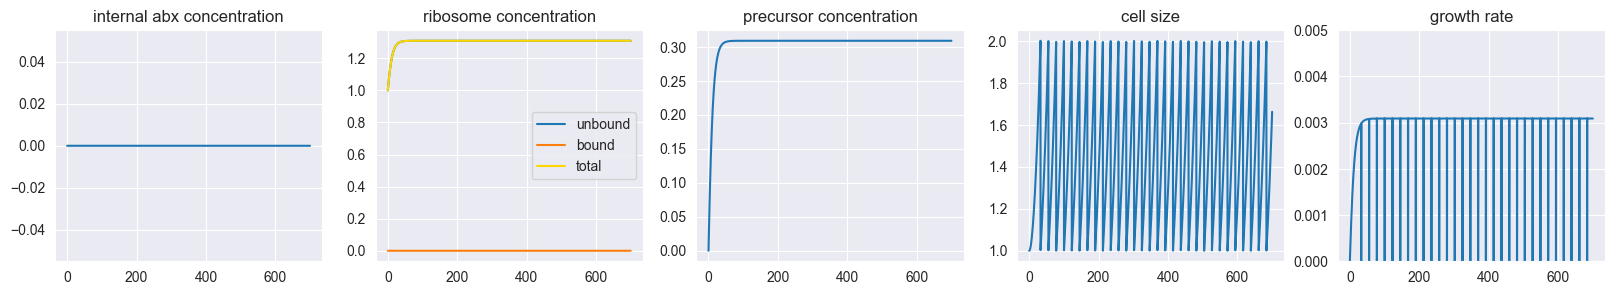

time to growth halt: 0.1
growth rate before treatment: nan
never recovered
generation time: nan


In [106]:
time_step = 0.1
admin_time = 0
recovery_time = 0
param1 = {"ribo_min": 0.5, 
          "p_in": 0.01, 
          "p_out": 0.01, 
          "k_on": 1, 
          "k_off": 0.1, 
          "alpha": 0.05, # ribosome synthesis rate
          "beta": 0.05, # translation rate
          "gama": 0.1, # cell wall synthesis rate
          "abx_env": 12, 
          "t_start": admin_time, 
          "t_end": recovery_time}
my_sim1 = Cell(**param1)
initial_conditions = [0, 1, 0, 0, 1] # internal antibiotics, unbound ribosomes, bound ribosomes, precursors, cell volume
length = 700
t_eval = np.arange(0, length, time_step)
time_series1 = my_sim1.cell_growth(initial_conditions, length=length, methods="RK45", t_eval=t_eval)
fig, axes = plt.subplots(1, 5, figsize=(20, 3))
axes[0].plot(time_series1.t, time_series1.y[0])
# axes[0].axvline(admin_time, c='r')
# axes[0].axvline(recovery_time, c='g')
axes[0].set_title("internal abx concentration")
axes[1].plot(time_series1.t, time_series1.y[1], label="unbound")
axes[1].plot(time_series1.t, time_series1.y[2], label="bound")
axes[1].plot(time_series1.t, time_series1.y[1] + time_series1.y[2], label="total", color="gold")
# axes[1].axvline(admin_time, c='r')
# axes[1].axvline(recovery_time, c='g')
axes[1].legend()
axes[1].set_title("ribosome concentration")
axes[2].plot(time_series1.t, time_series1.y[3])
# axes[2].axvline(admin_time, c='r')
# axes[2].axvline(recovery_time, c='g')
axes[2].set_title("precursor concentration")
axes[3].plot(time_series1.t, time_series1.y[4])
# axes[3].axvline(admin_time, c='r')
# axes[3].axvline(recovery_time, c='g')
axes[3].set_title("cell size")
axes[4].plot(time_series1.t, np.gradient(np.log(time_series1.y[4])))
# axes[4].axvline(admin_time, c='r')
# axes[4].axvline(recovery_time, c='g')
axes[4].set_ylim(0., 0.005)
axes[4].set_title("growth rate")
plt.show()
get_growth_info(time_series1)

## control

 24%|██▍       | 243/1000 [00:02<00:06, 116.76‰/s]

Cell size at treatment start: 1.0335595175637484


 40%|███▉      | 397/1000 [00:03<00:05, 118.06‰/s]

Cell size at treatment end: 5.340237716856614


100%|█████████▉| 999/1000 [00:08<00:00, 113.74‰/s]


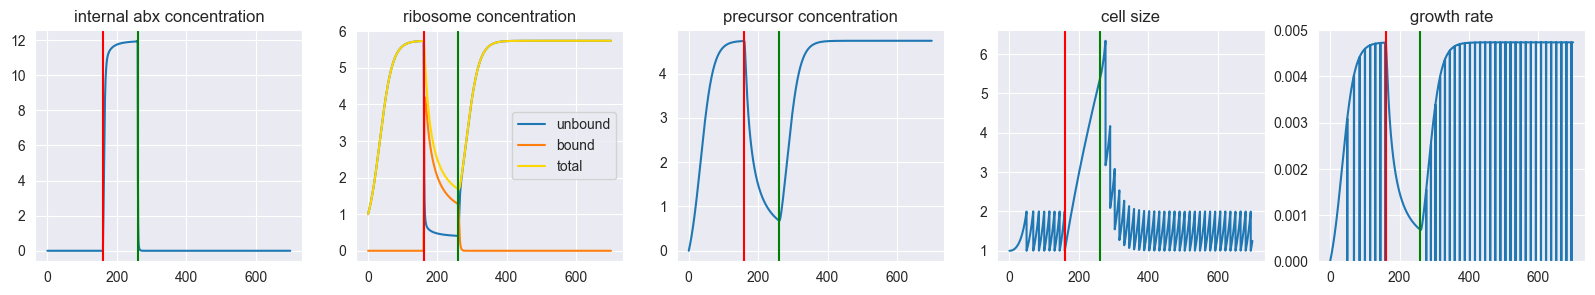

time to growth halt: 116.80000000000001
growth rate before treatment: 0.004696172446088712
time to growth recovery: 89.10000000000002
generation time: 14.775000000000002


In [81]:
time_step = 0.1
admin_time = 160
recovery_time = 260
param1 = {"ribo_min": 0.3, 
          "p_in": 0.05, 
          "p_out": 0.05, 
          "k_on": 1, 
          "k_off": 1, 
          "alpha": 0.05, # ribosome synthesis rate
          "beta": 0.05, # translation rate
          "gama": 0.01, # cell wall synthesis rate
          "abx_env": 12, 
          "t_start": admin_time, 
          "t_end": recovery_time}
my_sim1 = Cell(**param1)
initial_conditions = [0, 1, 0, 0, 1] # internal antibiotics, unbound ribosomes, bound ribosomes, precursors, cell volume
length = 700
t_eval = np.arange(0, length, time_step)
time_series1 = my_sim1.cell_growth(initial_conditions, length=length, methods="RK45", t_eval=t_eval)
fig, axes = plt.subplots(1, 5, figsize=(20, 3))
axes[0].plot(time_series1.t, time_series1.y[0])
axes[0].axvline(admin_time, c='r')
axes[0].axvline(recovery_time, c='g')
axes[0].set_title("internal abx concentration")
axes[1].plot(time_series1.t, time_series1.y[1], label="unbound")
axes[1].plot(time_series1.t, time_series1.y[2], label="bound")
axes[1].plot(time_series1.t, time_series1.y[1] + time_series1.y[2], label="total", color="gold")
axes[1].axvline(admin_time, c='r')
axes[1].axvline(recovery_time, c='g')
axes[1].legend()
axes[1].set_title("ribosome concentration")
axes[2].plot(time_series1.t, time_series1.y[3])
axes[2].axvline(admin_time, c='r')
axes[2].axvline(recovery_time, c='g')
axes[2].set_title("precursor concentration")
axes[3].plot(time_series1.t, time_series1.y[4])
axes[3].axvline(admin_time, c='r')
axes[3].axvline(recovery_time, c='g')
axes[3].set_title("cell size")
axes[4].plot(time_series1.t, np.gradient(np.log(time_series1.y[4])))
axes[4].axvline(admin_time, c='r')
axes[4].axvline(recovery_time, c='g')
axes[4].set_ylim(0., 0.005)
axes[4].set_title("growth rate")
plt.show()
get_growth_info(time_series1)

 26%|██▌       | 259/1000 [00:02<00:06, 116.89‰/s]

Cell size at treatment start: 1.0670785158599685


 40%|████      | 401/1000 [00:03<00:04, 130.97‰/s]

Cell size at treatment end: 1.6608427721861438


100%|█████████▉| 999/1000 [00:08<00:00, 116.78‰/s]


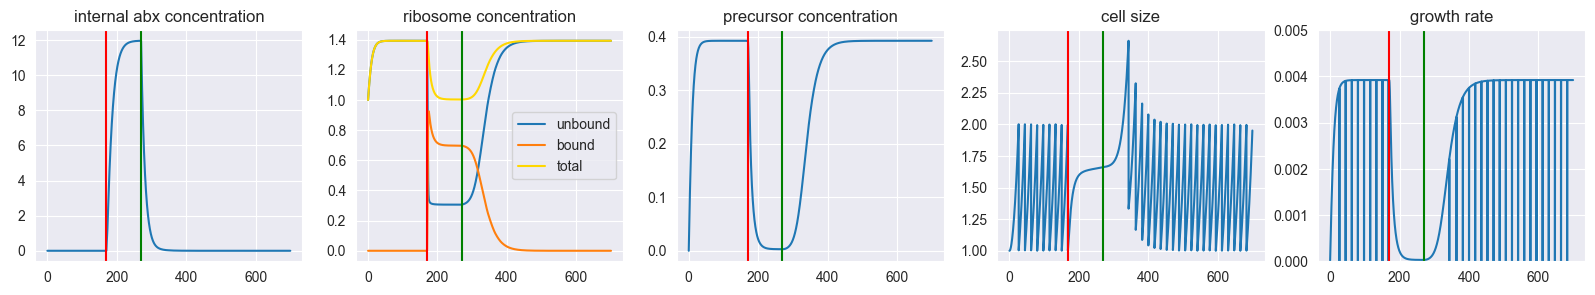

time to growth halt: 39.80000000000001
growth rate before treatment: 0.003922549399774158
time to growth recovery: 142.0
generation time: 17.666666666666668


In [86]:
time_step = 0.1
admin_time = 170
recovery_time = 270
param1 = {"ribo_min": 0.3, 
          "p_in": 0.01, 
          "p_out": 0.01, 
          "k_on": 1, 
          "k_off": 0.1, 
          "alpha": 0.05, # ribosome synthesis rate
          "beta": 0.05, # translation rate
          "gama": 0.1, # cell wall synthesis rate
          "abx_env": 12, 
          "t_start": admin_time, 
          "t_end": recovery_time}
my_sim1 = Cell(**param1)
initial_conditions = [0, 1, 0, 0, 1] # internal antibiotics, unbound ribosomes, bound ribosomes, precursors, cell volume
length = 700
t_eval = np.arange(0, length, time_step)
time_series1 = my_sim1.cell_growth(initial_conditions, length=length, methods="RK45", t_eval=t_eval)
fig, axes = plt.subplots(1, 5, figsize=(20, 3))
axes[0].plot(time_series1.t, time_series1.y[0])
axes[0].axvline(admin_time, c='r')
axes[0].axvline(recovery_time, c='g')
axes[0].set_title("internal abx concentration")
axes[1].plot(time_series1.t, time_series1.y[1], label="unbound")
axes[1].plot(time_series1.t, time_series1.y[2], label="bound")
axes[1].plot(time_series1.t, time_series1.y[1] + time_series1.y[2], label="total", color="gold")
axes[1].axvline(admin_time, c='r')
axes[1].axvline(recovery_time, c='g')
axes[1].legend()
axes[1].set_title("ribosome concentration")
axes[2].plot(time_series1.t, time_series1.y[3])
axes[2].axvline(admin_time, c='r')
axes[2].axvline(recovery_time, c='g')
axes[2].set_title("precursor concentration")
axes[3].plot(time_series1.t, time_series1.y[4])
axes[3].axvline(admin_time, c='r')
axes[3].axvline(recovery_time, c='g')
axes[3].set_title("cell size")
axes[4].plot(time_series1.t, np.gradient(np.log(time_series1.y[4])))
axes[4].axvline(admin_time, c='r')
axes[4].axvline(recovery_time, c='g')
axes[4].set_ylim(0., 0.005)
axes[4].set_title("growth rate")
plt.show()
get_growth_info(time_series1)

 26%|██▌       | 258/1000 [00:02<00:05, 126.00‰/s]

Cell size at treatment start: 1.0798435979747134


 41%|████      | 407/1000 [00:03<00:05, 115.83‰/s]

Cell size at treatment end: 1.5327342119100775


100%|█████████▉| 999/1000 [00:08<00:00, 117.09‰/s]


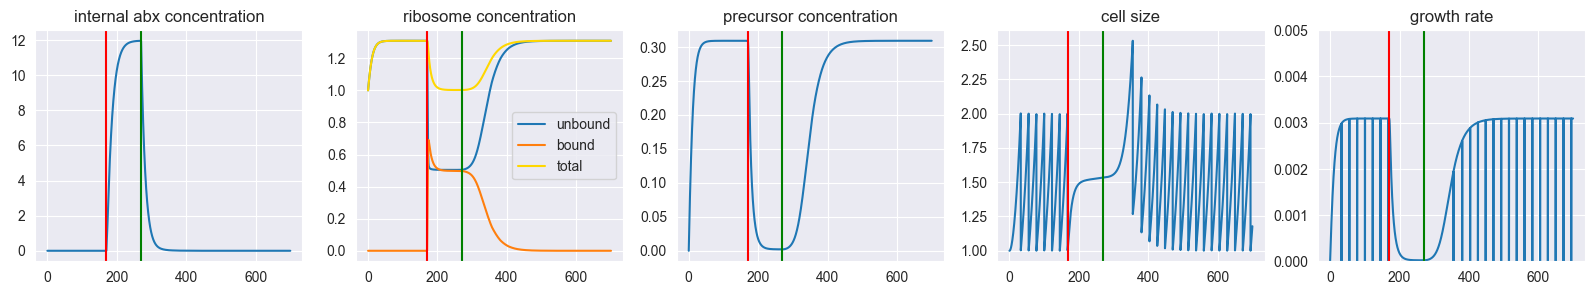

time to growth halt: 36.60000000000002
growth rate before treatment: 0.003090162463455251
time to growth recovery: 151.90000000000003
generation time: 22.433333333333334


In [87]:
time_step = 0.1
admin_time = 170
recovery_time = 270
param1 = {"ribo_min": 0.5, 
          "p_in": 0.01, 
          "p_out": 0.01, 
          "k_on": 1, 
          "k_off": 0.1, 
          "alpha": 0.05, # ribosome synthesis rate
          "beta": 0.05, # translation rate
          "gama": 0.1, # cell wall synthesis rate
          "abx_env": 12, 
          "t_start": admin_time, 
          "t_end": recovery_time}
my_sim1 = Cell(**param1)
initial_conditions = [0, 1, 0, 0, 1] # internal antibiotics, unbound ribosomes, bound ribosomes, precursors, cell volume
length = 700
t_eval = np.arange(0, length, time_step)
time_series1 = my_sim1.cell_growth(initial_conditions, length=length, methods="RK45", t_eval=t_eval)
fig, axes = plt.subplots(1, 5, figsize=(20, 3))
axes[0].plot(time_series1.t, time_series1.y[0])
axes[0].axvline(admin_time, c='r')
axes[0].axvline(recovery_time, c='g')
axes[0].set_title("internal abx concentration")
axes[1].plot(time_series1.t, time_series1.y[1], label="unbound")
axes[1].plot(time_series1.t, time_series1.y[2], label="bound")
axes[1].plot(time_series1.t, time_series1.y[1] + time_series1.y[2], label="total", color="gold")
axes[1].axvline(admin_time, c='r')
axes[1].axvline(recovery_time, c='g')
axes[1].legend()
axes[1].set_title("ribosome concentration")
axes[2].plot(time_series1.t, time_series1.y[3])
axes[2].axvline(admin_time, c='r')
axes[2].axvline(recovery_time, c='g')
axes[2].set_title("precursor concentration")
axes[3].plot(time_series1.t, time_series1.y[4])
axes[3].axvline(admin_time, c='r')
axes[3].axvline(recovery_time, c='g')
axes[3].set_title("cell size")
axes[4].plot(time_series1.t, np.gradient(np.log(time_series1.y[4])))
axes[4].axvline(admin_time, c='r')
axes[4].axvline(recovery_time, c='g')
axes[4].set_ylim(0., 0.005)
axes[4].set_title("growth rate")
plt.show()
get_growth_info(time_series1)

 26%|██▌       | 261/1000 [00:02<00:05, 125.37‰/s]

Cell size at treatment start: 1.9248166837329892


 40%|████      | 403/1000 [00:03<00:04, 127.22‰/s]

Cell size at treatment end: 8.487400295546676


100%|█████████▉| 999/1000 [00:08<00:00, 115.93‰/s]


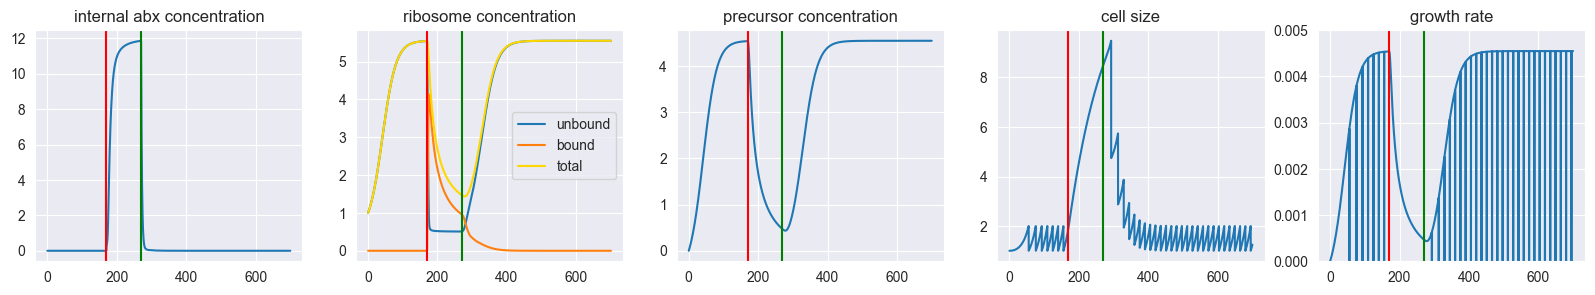

time to growth halt: 123.0
growth rate before treatment: 0.004481215232612856
time to growth recovery: 127.5
generation time: 15.433333333333332


In [107]:
time_step = 0.1
admin_time = 170
recovery_time = 270
param1 = {"ribo_min": 0.5, 
          "p_in": 0.01, 
          "p_out": 0.01, 
          "k_on": 1, 
          "k_off": 0.1, 
          "alpha": 0.05, # ribosome synthesis rate
          "beta": 0.05, # translation rate
          "gama": 0.01, # cell wall synthesis rate
          "abx_env": 12, 
          "t_start": admin_time, 
          "t_end": recovery_time}
my_sim1 = Cell(**param1)
initial_conditions = [0, 1, 0, 0, 1] # internal antibiotics, unbound ribosomes, bound ribosomes, precursors, cell volume
length = 700
t_eval = np.arange(0, length, time_step)
time_series1 = my_sim1.cell_growth(initial_conditions, length=length, methods="RK45", t_eval=t_eval)
fig, axes = plt.subplots(1, 5, figsize=(20, 3))
axes[0].plot(time_series1.t, time_series1.y[0])
axes[0].axvline(admin_time, c='r')
axes[0].axvline(recovery_time, c='g')
axes[0].set_title("internal abx concentration")
axes[1].plot(time_series1.t, time_series1.y[1], label="unbound")
axes[1].plot(time_series1.t, time_series1.y[2], label="bound")
axes[1].plot(time_series1.t, time_series1.y[1] + time_series1.y[2], label="total", color="gold")
axes[1].axvline(admin_time, c='r')
axes[1].axvline(recovery_time, c='g')
axes[1].legend()
axes[1].set_title("ribosome concentration")
axes[2].plot(time_series1.t, time_series1.y[3])
axes[2].axvline(admin_time, c='r')
axes[2].axvline(recovery_time, c='g')
axes[2].set_title("precursor concentration")
axes[3].plot(time_series1.t, time_series1.y[4])
axes[3].axvline(admin_time, c='r')
axes[3].axvline(recovery_time, c='g')
axes[3].set_title("cell size")
axes[4].plot(time_series1.t, np.gradient(np.log(time_series1.y[4])))
axes[4].axvline(admin_time, c='r')
axes[4].axvline(recovery_time, c='g')
axes[4].set_ylim(0., 0.005)
axes[4].set_title("growth rate")
plt.show()
get_growth_info(time_series1)

 26%|██▌       | 260/1000 [00:02<00:06, 118.66‰/s]

Cell size at treatment start: 1.0770970693418456


 41%|████      | 407/1000 [00:03<00:04, 121.62‰/s]

Cell size at treatment end: 3.4531307511443763


100%|█████████▉| 999/1000 [00:08<00:00, 120.16‰/s]


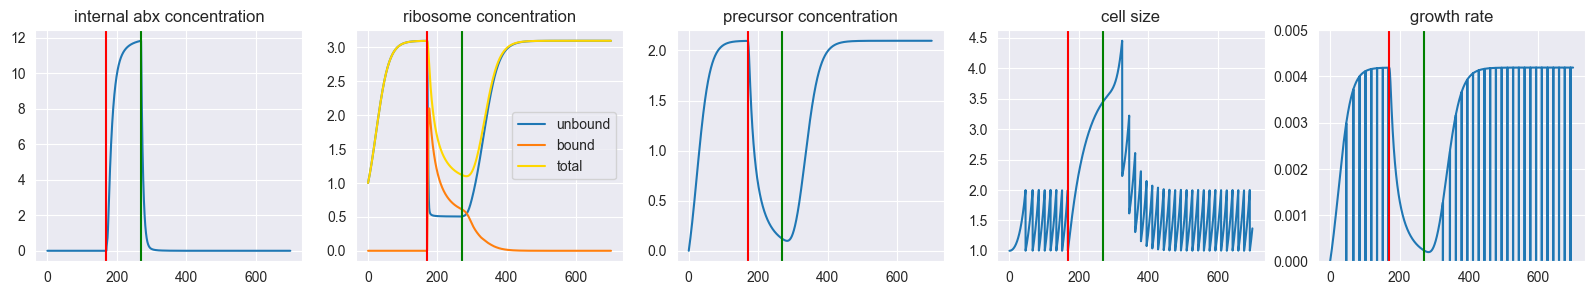

time to growth halt: 154.8
growth rate before treatment: 0.0041702902413149265
time to growth recovery: 142.10000000000002
generation time: 16.625000000000004


In [99]:
time_step = 0.1
admin_time = 170
recovery_time = 270
param1 = {"ribo_min": 0.5, 
          "p_in": 0.01, 
          "p_out": 0.01, 
          "k_on": 1, 
          "k_off": 0.1, 
          "alpha": 0.05, # ribosome synthesis rate
          "beta": 0.05, # translation rate
          "gama": 0.02, # cell wall synthesis rate
          "abx_env": 12, 
          "t_start": admin_time, 
          "t_end": recovery_time}
my_sim1 = Cell(**param1)
initial_conditions = [0, 1, 0, 0, 1] # internal antibiotics, unbound ribosomes, bound ribosomes, precursors, cell volume
length = 700
t_eval = np.arange(0, length, time_step)
time_series1 = my_sim1.cell_growth(initial_conditions, length=length, methods="RK45", t_eval=t_eval)
fig, axes = plt.subplots(1, 5, figsize=(20, 3))
axes[0].plot(time_series1.t, time_series1.y[0])
axes[0].axvline(admin_time, c='r')
axes[0].axvline(recovery_time, c='g')
axes[0].set_title("internal abx concentration")
axes[1].plot(time_series1.t, time_series1.y[1], label="unbound")
axes[1].plot(time_series1.t, time_series1.y[2], label="bound")
axes[1].plot(time_series1.t, time_series1.y[1] + time_series1.y[2], label="total", color="gold")
axes[1].axvline(admin_time, c='r')
axes[1].axvline(recovery_time, c='g')
axes[1].legend()
axes[1].set_title("ribosome concentration")
axes[2].plot(time_series1.t, time_series1.y[3])
axes[2].axvline(admin_time, c='r')
axes[2].axvline(recovery_time, c='g')
axes[2].set_title("precursor concentration")
axes[3].plot(time_series1.t, time_series1.y[4])
axes[3].axvline(admin_time, c='r')
axes[3].axvline(recovery_time, c='g')
axes[3].set_title("cell size")
axes[4].plot(time_series1.t, np.gradient(np.log(time_series1.y[4])))
axes[4].axvline(admin_time, c='r')
axes[4].axvline(recovery_time, c='g')
axes[4].set_ylim(0., 0.005)
axes[4].set_title("growth rate")
plt.show()
get_growth_info(time_series1)

 25%|██▍       | 249/1000 [00:02<00:06, 117.66‰/s]

Cell size at treatment start: 1.4835770490829547


 47%|████▋     | 471/1000 [00:04<00:04, 109.28‰/s]

Cell size at treatment end: 3.3175906464012592


100%|█████████▉| 999/1000 [00:08<00:00, 117.16‰/s]


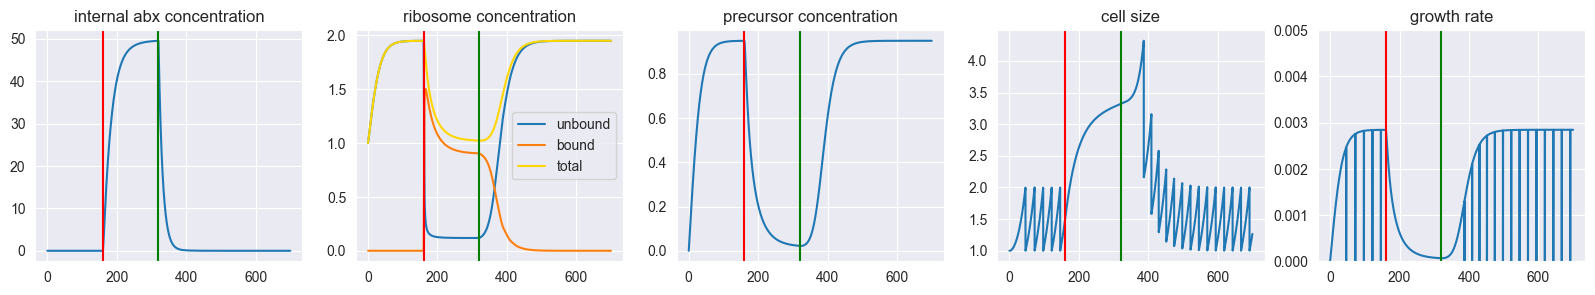

time to growth halt: 118.0
growth rate before treatment: 0.002840617563232454
time to growth recovery: 135.90000000000003
generation time: 24.39999999999999


In [42]:
time_step = 0.1
admin_time = 160
recovery_time = 320
param1 = {"ribo_min": 0.1, 
          "p_in": 0.005, 
          "p_out": 0.005, 
          "k_on": 1, 
          "k_off": 1, 
          "alpha": 0.03, # ribosome synthesis rate
          "beta": 0.03, # translation rate
          "gama": 0.03, # cell wall synthesis rate
          "abx_env": 50, 
          "t_start": admin_time, 
          "t_end": recovery_time}
my_sim1 = Cell(**param1)
initial_conditions = [0, 1, 0, 0, 1] # internal antibiotics, unbound ribosomes, bound ribosomes, precursors, cell volume
length = 700
t_eval = np.arange(0, length, time_step)
time_series1 = my_sim1.cell_growth(initial_conditions, length=length, methods="RK45", t_eval=t_eval)
fig, axes = plt.subplots(1, 5, figsize=(20, 3))
axes[0].plot(time_series1.t, time_series1.y[0])
axes[0].axvline(admin_time, c='r')
axes[0].axvline(recovery_time, c='g')
axes[0].set_title("internal abx concentration")
axes[1].plot(time_series1.t, time_series1.y[1], label="unbound")
axes[1].plot(time_series1.t, time_series1.y[2], label="bound")
axes[1].plot(time_series1.t, time_series1.y[1] + time_series1.y[2], label="total", color="gold")
axes[1].axvline(admin_time, c='r')
axes[1].axvline(recovery_time, c='g')
axes[1].legend()
axes[1].set_title("ribosome concentration")
axes[2].plot(time_series1.t, time_series1.y[3])
axes[2].axvline(admin_time, c='r')
axes[2].axvline(recovery_time, c='g')
axes[2].set_title("precursor concentration")
axes[3].plot(time_series1.t, time_series1.y[4])
axes[3].axvline(admin_time, c='r')
axes[3].axvline(recovery_time, c='g')
axes[3].set_title("cell size")
axes[4].plot(time_series1.t, np.gradient(np.log(time_series1.y[4])))
axes[4].axvline(admin_time, c='r')
axes[4].axvline(recovery_time, c='g')
axes[4].set_ylim(0., 0.005)
axes[4].set_title("growth rate")
plt.show()
get_growth_info(time_series1)

 25%|██▌       | 252/1000 [00:02<00:06, 118.64‰/s]

Cell size at treatment start: 1.86351843490244


 48%|████▊     | 480/1000 [00:04<00:04, 119.50‰/s]

Cell size at treatment end: 3.4464301612152286


100%|█████████▉| 999/1000 [00:08<00:00, 113.53‰/s]


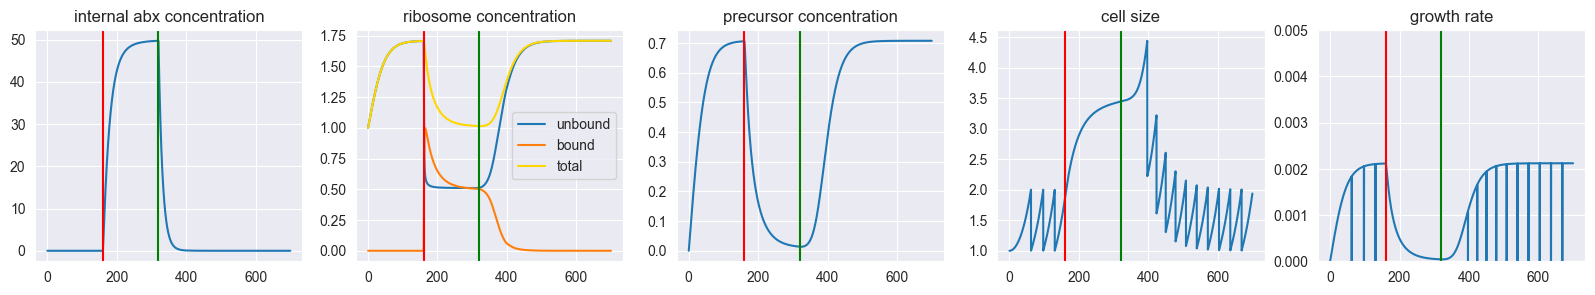

time to growth halt: 99.19999999999999
growth rate before treatment: 0.002099418517856039
time to growth recovery: 140.8
generation time: nan


In [43]:
time_step = 0.1
admin_time = 160
recovery_time = 320
param1 = {"ribo_min": 0.5, 
          "p_in": 0.005, 
          "p_out": 0.005, 
          "k_on": 1, 
          "k_off": 1, 
          "alpha": 0.03, # ribosome synthesis rate
          "beta": 0.03, # translation rate
          "gama": 0.03, # cell wall synthesis rate
          "abx_env": 50, 
          "t_start": admin_time, 
          "t_end": recovery_time}
my_sim1 = Cell(**param1)
initial_conditions = [0, 1, 0, 0, 1] # internal antibiotics, unbound ribosomes, bound ribosomes, precursors, cell volume
length = 700
t_eval = np.arange(0, length, time_step)
time_series1 = my_sim1.cell_growth(initial_conditions, length=length, methods="RK45", t_eval=t_eval)
fig, axes = plt.subplots(1, 5, figsize=(20, 3))
axes[0].plot(time_series1.t, time_series1.y[0])
axes[0].axvline(admin_time, c='r')
axes[0].axvline(recovery_time, c='g')
axes[0].set_title("internal abx concentration")
axes[1].plot(time_series1.t, time_series1.y[1], label="unbound")
axes[1].plot(time_series1.t, time_series1.y[2], label="bound")
axes[1].plot(time_series1.t, time_series1.y[1] + time_series1.y[2], label="total", color="gold")
axes[1].axvline(admin_time, c='r')
axes[1].axvline(recovery_time, c='g')
axes[1].legend()
axes[1].set_title("ribosome concentration")
axes[2].plot(time_series1.t, time_series1.y[3])
axes[2].axvline(admin_time, c='r')
axes[2].axvline(recovery_time, c='g')
axes[2].set_title("precursor concentration")
axes[3].plot(time_series1.t, time_series1.y[4])
axes[3].axvline(admin_time, c='r')
axes[3].axvline(recovery_time, c='g')
axes[3].set_title("cell size")
axes[4].plot(time_series1.t, np.gradient(np.log(time_series1.y[4])))
axes[4].axvline(admin_time, c='r')
axes[4].axvline(recovery_time, c='g')
axes[4].set_ylim(0., 0.005)
axes[4].set_title("growth rate")
plt.show()
get_growth_info(time_series1)

## slow ribo syn

 24%|██▍       | 242/1000 [00:02<00:06, 116.66‰/s]

Cell size at treatment start: 1.652505318018581


 51%|█████▏    | 513/1000 [00:04<00:04, 117.85‰/s]

Cell size at treatment end: 2.804983231969296


100%|█████████▉| 999/1000 [00:08<00:00, 119.18‰/s]


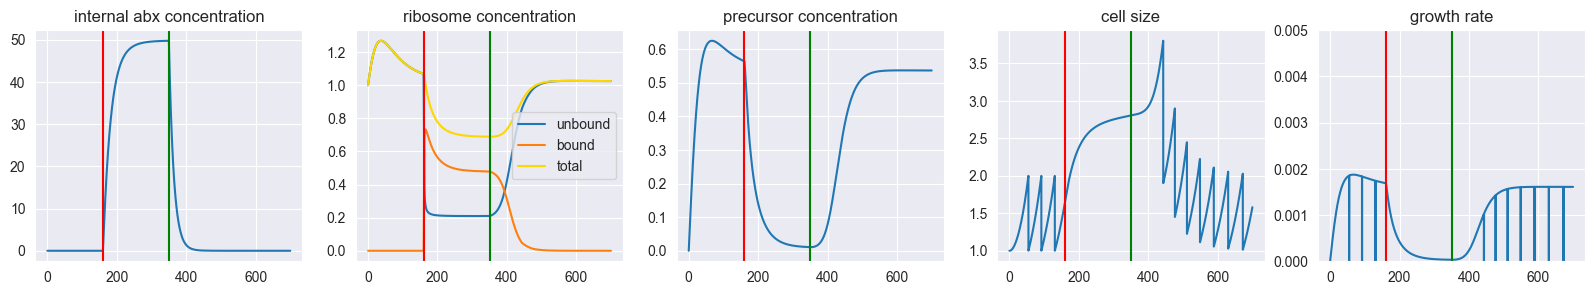

time to growth halt: 93.9
growth rate before treatment: 0.001746807831750611
never recovered
generation time: nan


In [32]:
time_step = 0.1
admin_time = 160
recovery_time = 350
param1 = {"ribo_min": 0.2, 
          "p_in": 0.005, 
          "p_out": 0.005, 
          "k_on": 1, 
          "k_off": 1, 
          "alpha": 0.02, # ribosome synthesis rate
          "beta": 0.03, # translation rate
          "gama": 0.03, # cell wall synthesis rate
          "abx_env": 50, 
          "t_start": admin_time, 
          "t_end": recovery_time}
my_sim1 = Cell(**param1)
initial_conditions = [0, 1, 0, 0, 1] # internal antibiotics, unbound ribosomes, bound ribosomes, precursors, cell volume
length = 700
t_eval = np.arange(0, length, time_step)
time_series1 = my_sim1.cell_growth(initial_conditions, length=length, methods="RK45", t_eval=t_eval)
fig, axes = plt.subplots(1, 5, figsize=(20, 3))
axes[0].plot(time_series1.t, time_series1.y[0])
axes[0].axvline(admin_time, c='r')
axes[0].axvline(recovery_time, c='g')
axes[0].set_title("internal abx concentration")
axes[1].plot(time_series1.t, time_series1.y[1], label="unbound")
axes[1].plot(time_series1.t, time_series1.y[2], label="bound")
axes[1].plot(time_series1.t, time_series1.y[1] + time_series1.y[2], label="total", color="gold")
axes[1].axvline(admin_time, c='r')
axes[1].axvline(recovery_time, c='g')
axes[1].legend()
axes[1].set_title("ribosome concentration")
axes[2].plot(time_series1.t, time_series1.y[3])
axes[2].axvline(admin_time, c='r')
axes[2].axvline(recovery_time, c='g')
axes[2].set_title("precursor concentration")
axes[3].plot(time_series1.t, time_series1.y[4])
axes[3].axvline(admin_time, c='r')
axes[3].axvline(recovery_time, c='g')
axes[3].set_title("cell size")
axes[4].plot(time_series1.t, np.gradient(np.log(time_series1.y[4])))
axes[4].axvline(admin_time, c='r')
axes[4].axvline(recovery_time, c='g')
axes[4].set_ylim(0., 0.005)
axes[4].set_title("growth rate")
plt.show()
get_growth_info(time_series1)

## Slow unbinding

 32%|███▏      | 318/1000 [00:01<00:04, 167.17‰/s]

Cell size at treatment start: 1.1642522820441452


 52%|█████▏    | 515/1000 [00:02<00:03, 154.99‰/s]

Cell size at treatment end: 1.6226709857016457


100%|██████████| 1000/1000 [00:05<00:00, 169.24‰/s]


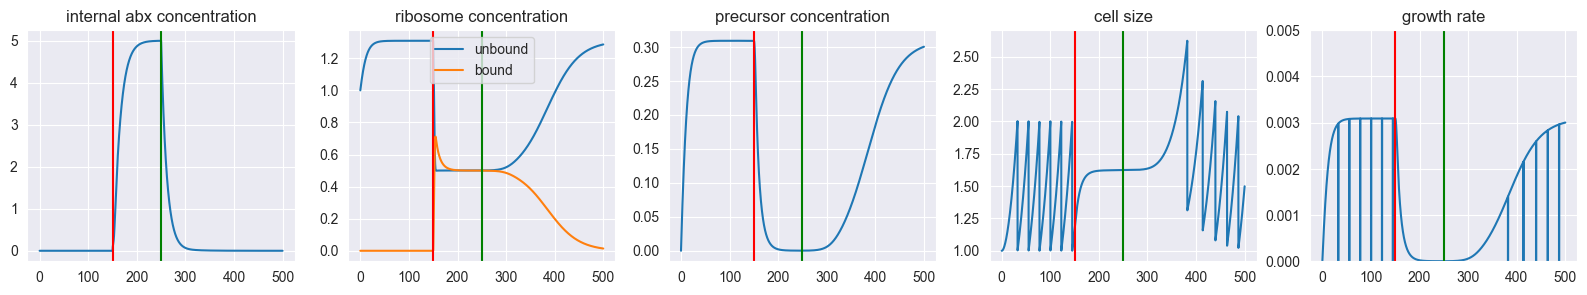

time to growth halt: 34.0
growth rate before treatment: 0.0030901594953119263
time to growth recovery: 245.5
generation time: 22.4


In [65]:
admin_time = 150
recovery_time = 250
param2 = {"ribo_min": 0.5, 
          "p_in": 0.01, 
          "p_out": 0.01, 
          "k_on": 3, 
          "k_off": 0.01, 
          "alpha": 0.05, # ribosome synthesis rate
          "beta": 0.05, # translation rate
          "gama": 0.1, # cell wall synthesis rate
          "abx_env": 5, 
          "t_start": admin_time, 
          "t_end": recovery_time}
my_sim2 = Cell(**param2)
length = 500
t_eval = np.arange(0, length, time_step)
time_series2 = my_sim2.cell_growth(initial_conditions, length=length, methods="RK45", t_eval=t_eval)

fig, axes = plt.subplots(1, 5, figsize=(20, 3))
axes[0].plot(time_series2.t, time_series2.y[0])
axes[0].axvline(admin_time, c='r')
axes[0].axvline(recovery_time, c='g')
axes[0].set_title("internal abx concentration")
axes[1].plot(time_series2.t, time_series2.y[1], label="unbound")
axes[1].plot(time_series2.t, time_series2.y[2], label="bound")
axes[1].axvline(admin_time, c='r')
axes[1].axvline(recovery_time, c='g')
axes[1].legend()
axes[1].set_title("ribosome concentration")
axes[2].plot(time_series2.t, time_series2.y[3])
axes[2].axvline(admin_time, c='r')
axes[2].axvline(recovery_time, c='g')
axes[2].set_title("precursor concentration")
axes[3].plot(time_series2.t, time_series2.y[4])
axes[3].axvline(admin_time, c='r')
axes[3].axvline(recovery_time, c='g')
axes[3].set_title("cell size")
axes[4].plot(time_series2.t, np.gradient(np.log(time_series2.y[4])))
axes[4].axvline(admin_time, c='r')
axes[4].axvline(recovery_time, c='g')
axes[4].set_ylim(0., 0.005)
axes[4].set_title("growth rate")
plt.show()
get_growth_info(time_series2)

## bigger cell size

 27%|██▋       | 271/1000 [00:02<00:06, 120.06‰/s]

Cell size at treatment start: 1.1642522820441452


 60%|█████▉    | 598/1000 [00:04<00:03, 116.10‰/s]

Cell size at treatment end: 1.6254031316874236


100%|█████████▉| 999/1000 [00:07<00:00, 126.89‰/s]


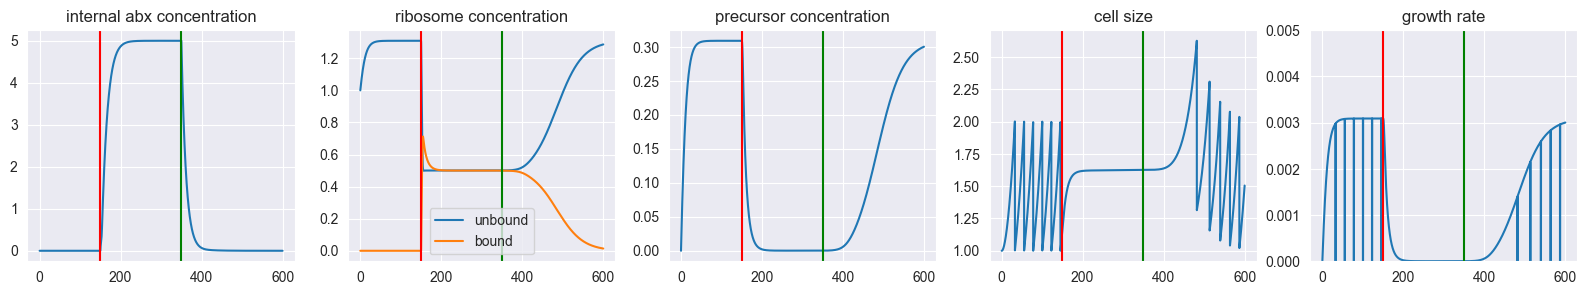

time to growth halt: 34.0
generation time: 22.4


In [54]:
admin_time = 150
recovery_time = 350
param3 = {"ribo_min": 0.5, 
          "p_in": 0.01, 
          "p_out": 0.01, 
          "k_on": 3, 
          "k_off": 0.01, 
          "alpha": 0.05, # ribosome synthesis rate
          "beta": 0.05, # translation rate
          "gama": 0.1, # cell wall synthesis rate
          "abx_env": 5, 
          "t_start": admin_time, 
          "t_end": recovery_time}
my_sim3 = Cell(**param3)
length = 600
t_eval = np.arange(0, length, time_step)
time_series3 = my_sim3.cell_growth(initial_conditions, length=length, methods="RK45", t_eval=t_eval)

fig, axes = plt.subplots(1, 5, figsize=(20, 3))
axes[0].plot(time_series3.t, time_series3.y[0])
axes[0].axvline(admin_time, c='r')
axes[0].axvline(recovery_time, c='g')
axes[0].set_title("internal abx concentration")
axes[1].plot(time_series3.t, time_series3.y[1], label="unbound")
axes[1].plot(time_series3.t, time_series3.y[2], label="bound")
axes[1].axvline(admin_time, c='r')
axes[1].axvline(recovery_time, c='g')
axes[1].legend()
axes[1].set_title("ribosome concentration")
axes[2].plot(time_series3.t, time_series3.y[3])
axes[2].axvline(admin_time, c='r')
axes[2].axvline(recovery_time, c='g')
axes[2].set_title("precursor concentration")
axes[3].plot(time_series3.t, time_series3.y[4])
axes[3].axvline(admin_time, c='r')
axes[3].axvline(recovery_time, c='g')
axes[3].set_title("cell size")
axes[4].plot(time_series3.t, np.gradient(np.log(time_series3.y[4])))
axes[4].axvline(admin_time, c='r')
axes[4].axvline(recovery_time, c='g')
axes[4].set_ylim(0., 0.005)
axes[4].set_title("growth rate")
plt.show()
get_growth_info(time_series3)

## more active proportion of ribosome

 26%|██▋       | 264/1000 [00:01<00:05, 140.86‰/s]

Cell size at treatment start: 1.4262665463535864


 61%|██████    | 607/1000 [00:04<00:02, 147.20‰/s]

Cell size at treatment end: 2.3444380008169468


100%|█████████▉| 999/1000 [00:07<00:00, 139.41‰/s]


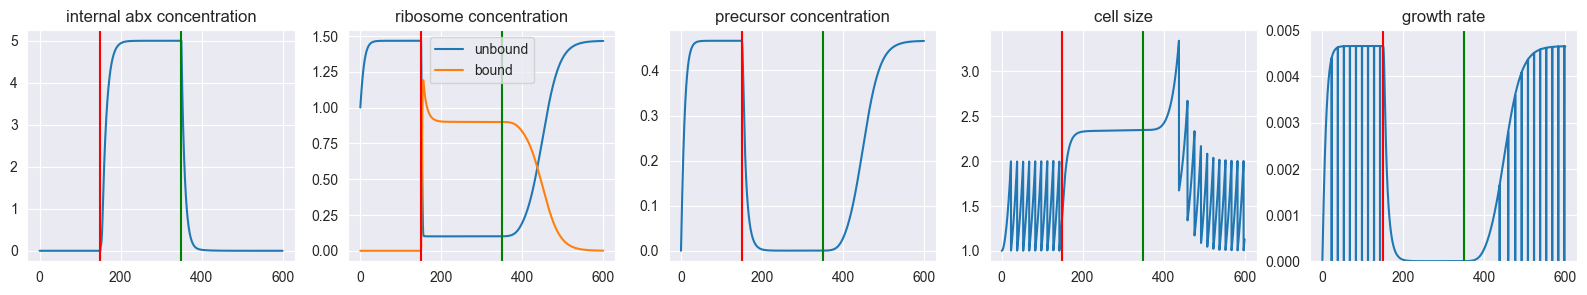

time to growth halt: 37.5
generation time: 14.850000000000001


In [53]:
admin_time = 150
recovery_time = 350
param4 = {"ribo_min": 0.1, 
          "p_in": 0.01, 
          "p_out": 0.01, 
          "k_on": 3, 
          "k_off": 0.01, 
          "alpha": 0.05, # ribosome synthesis rate
          "beta": 0.05, # translation rate
          "gama": 0.1, # cell wall synthesis rate
          "abx_env": 5, 
          "t_start": admin_time, 
          "t_end": recovery_time}
my_sim4 = Cell(**param4)
length = 600
t_eval = np.arange(0, length, time_step)
time_series4 = my_sim4.cell_growth(initial_conditions, length=length, methods="RK45", t_eval=t_eval)

fig, axes = plt.subplots(1, 5, figsize=(20, 3))
axes[0].plot(time_series4.t, time_series4.y[0])
axes[0].axvline(admin_time, c='r')
axes[0].axvline(recovery_time, c='g')
axes[0].set_title("internal abx concentration")
axes[1].plot(time_series4.t, time_series4.y[1], label="unbound")
axes[1].plot(time_series4.t, time_series4.y[2], label="bound")
axes[1].axvline(admin_time, c='r')
axes[1].axvline(recovery_time, c='g')
axes[1].legend()
axes[1].set_title("ribosome concentration")
axes[2].plot(time_series4.t, time_series4.y[3])
axes[2].axvline(admin_time, c='r')
axes[2].axvline(recovery_time, c='g')
axes[2].set_title("precursor concentration")
axes[3].plot(time_series4.t, time_series4.y[4])
axes[3].axvline(admin_time, c='r')
axes[3].axvline(recovery_time, c='g')
axes[3].set_title("cell size")
axes[4].plot(time_series4.t, np.gradient(np.log(time_series4.y[4])))
axes[4].axvline(admin_time, c='r')
axes[4].axvline(recovery_time, c='g')
axes[4].set_ylim(0., 0.005)
axes[4].set_title("growth rate")
plt.show()
get_growth_info(time_series4)

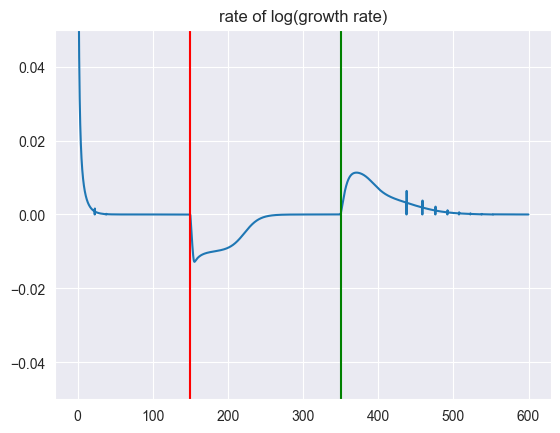

In [38]:
fig, ax = plt.subplots()
log_gr = []
for gr in np.gradient(np.log(time_series4.y[4])):
    if gr > 0:
        log_gr.append(np.log(gr))
    else:
        log_gr.append(log_gr[-1])
ax.plot(time_series4.t, np.gradient(log_gr))
ax.axvline(admin_time, c='r')
ax.axvline(recovery_time, c='g')
ax.set_ylim(-0.05, 0.05)
ax.set_title("rate of log(growth rate)")
plt.show()

### add maturation?